# TensorFlow

So far we have only used NumPy as a computational library. TensorFlow and Sklearn are more powerful for ML.

To repeat earlier content:
- scalars are a tensor rank: 0
- vectors are a tensor rank: 1
- matrices are a tensor rank: 2
- tensors can have rank: n

A lot of other courses are based on sklearn. It is quite common and a useful module.

Google is a leader in ML and is a constant innovator. As ML was developing, they developed TensorFlow for internal use. In 2015 they released it to the public. It is the leading library for deep neural networks, convolutional neural networks and recurrant neural networks. 

One of the biggest advantages of tensorflow is that it not only uses the CPU of the computer but the GPU too. This is crucial for the speed of the algorithms. Tensorflow uses a lot of computing power.

Recently google introduced TPUs, or tensor processing units, which improves performance even further. 

Sklearn does not offer the same functionality as TensorFlow for neural networks. We can make the opposite point for other fields of ML. For random clustering such as k-means and random forests, sklearn can be a better fit. 

This is espeically true with pre-processing.

Theory is the same regardless of library.

The difference is just in the code.

## TensorFlow History

The original TensorFlow 1 package was extremely complex to use, had strange logic to its code and was very verbose. It was useful but popularity faded quickly.

This lead to higher-level packages built on top of it, such as PyTorch and Keras. 

Keras is interesting as in 2017, it was integrated into core TensorFlow. Both TensorFlow and Keras are open source, so it makes sense to combine them.

The Keras author stated that Keras was intended to be an interface for TensorFlow, rather than a different library.

Even with Keras implemented, it was still losing popularity. 

In 2019, TensorFlow 2.0 came on the horizon. It was catching up with demand for higher-level programming.

They mainly adopted Keras. 

TF2 has the versatility of TF1 and the high-level simplicity of Keras. It also has a simplified API, no duplicate or deprecated functions. It had some new functions too. Mainly, it implements 'Eager Execution', which means it allows Pythons standard rules of physics to apply to it, rather than complex computational graphs.


## Intro

Our practical example of building a Neural Network was around 20 lines of code all-in. 

TensorFlow would also be done in around 20 lines of code. However, an exercise later in the course would require a few hundred lines of code, but tensorflow would still be around 20.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Generation

In [20]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs + -3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs,targets=generated_targets)

TensorFlow doesnt work well with excel or csv files. It works with tensors so it wants a format that can store the information in tensors. The solution is NumPys .npz file types. It allows you to save multi-dimensional arrays.

An important part of pre-processing for ML is getting data into an .npz filetype.

The np.savez function takes a file name parameter and then all the arrays that need saving. In this case, the generated_inputs and generated_targets arrays, giving them labels.

The file is saved into the same directory that holds this notebook.

## Solving with TensorFlow

In [21]:
training_data = np.load('TF_intro.npz')

tf.keras.Sequential is the function that specifies how the model will be laid down ('stacks layers'). It takes the different layers we want to include in the model. The algo takes inputs, applies single linear combination and provides an output:
- Linear combination + Output = Layer

tf.keras.layers.Dense() takes the inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias. The parameter it takes is the output size we want. This is similar to what we did manually with NumPy.

In [22]:
input_size = 2 # we are putting in two inputs, xs and zs
output_size = 1 # we want one output, y


model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

So far we have Data and a Model. Now we need to set the objective function and optimisation algorithm.

model.compile() configures the model for training, taking the optimiser and loss parameters.

SGD stands for Stochastic Gradient Descent. We will use it as the optimiser.

We will use the L2-norm loss to make it similar to the other example we did. It is also known as the least sum of squares. Scaling it by observations is basically finding the mean. The mean_squared_error() is the closest option for TensorFlow.

In [23]:
model.compile(optimizer='sgd',loss='mean_squared_error')

We just need to indicate to the model what data to fit.

model.fit trains the model with parameters for inputs and targets. This is also where we set the number of iterations. An iteration in ML is called an epoch. 

In [24]:
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 0s - loss: 24.2433
Epoch 2/100
32/32 - 0s - loss: 4.6547
Epoch 3/100
32/32 - 0s - loss: 1.4886
Epoch 4/100
32/32 - 0s - loss: 0.6592
Epoch 5/100
32/32 - 0s - loss: 0.4201
Epoch 6/100
32/32 - 0s - loss: 0.3640
Epoch 7/100
32/32 - 0s - loss: 0.3617
Epoch 8/100
32/32 - 0s - loss: 0.3525
Epoch 9/100
32/32 - 0s - loss: 0.3463
Epoch 10/100
32/32 - 0s - loss: 0.3584
Epoch 11/100
32/32 - 0s - loss: 0.3450
Epoch 12/100
32/32 - 0s - loss: 0.3495
Epoch 13/100
32/32 - 0s - loss: 0.3443
Epoch 14/100
32/32 - 0s - loss: 0.3482
Epoch 15/100
32/32 - 0s - loss: 0.3479
Epoch 16/100
32/32 - 0s - loss: 0.3507
Epoch 17/100
32/32 - 0s - loss: 0.3480
Epoch 18/100
32/32 - 0s - loss: 0.3515
Epoch 19/100
32/32 - 0s - loss: 0.3422
Epoch 20/100
32/32 - 0s - loss: 0.3460
Epoch 21/100
32/32 - 0s - loss: 0.3570
Epoch 22/100
32/32 - 0s - loss: 0.3466
Epoch 23/100
32/32 - 0s - loss: 0.3476
Epoch 24/100
32/32 - 0s - loss: 0.3470
Epoch 25/100
32/32 - 0s - loss: 0.3497
Epoch 26/100
32/32 - 0s - loss: 0

Verbose = 0 doesn't give much info after training the model, other than a log stating that it has been stored as an object. 

Verbose = 1 would give us a progress bar.It's a lot of info and not necessarily useful to have in jupyter. Maybe in another environment.

Verbose = 2 is maybe the better ground as it logs one line per epoch and can help see loss function per iteration.

We created the function $2x - 3z + 5 + noise$, however, in a real-life situation we would never know the exact function so it wouldnt be possible to know exactly how well the model has fared.  

## Extract the weights and bias

In [25]:
model.layers[0].get_weights() # [0] signifies the layer we are interested in.

[array([[ 2.020438 ],
        [-2.9489985]], dtype=float32),
 array([5.003956], dtype=float32)]

In [26]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.020438 ],
       [-2.9489985]], dtype=float32)

In [27]:
bias = model.layers[0].get_weights()[1]
bias

array([5.003956], dtype=float32)

These variables confirm the model has found the relationship.

## Extract the outputs and make predictions

model.predict_on_batch(data) calculates the outputs given inputs. These are the values that are compared to the targets to evaluate the loss function. It is an array with corresponding outputs for each input. 

These are the outputs based on the trained model, or the outputs after 100 epochs of training. Since the outputs are compared to the targets at each epoch, it may be interesting to compare them manually. To do that, you can round the output data to have one decimal point, and also output the training data targets.

In [30]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 31.2],
       [ 20.1],
       [-31.6],
       [  9.9],
       [-19. ],
       [  1.9],
       [ 13. ],
       [ 31. ],
       [ 18.1],
       [  7.8],
       [ 11.7],
       [ 37. ],
       [-21.9],
       [  7.6],
       [  7.3],
       [ -9.5],
       [  4.8],
       [-12.4],
       [  1.4],
       [ 25.6],
       [ 16.6],
       [ 20.2],
       [ -0.4],
       [  0.3],
       [ -1.2],
       [-18.4],
       [-37.1],
       [ 21.5],
       [ -1.3],
       [ 22.8],
       [-10.9],
       [-23.8],
       [ 35.1],
       [-40.7],
       [ 14.5],
       [  7.2],
       [ 34.1],
       [-20.2],
       [ -1.8],
       [ 13.9],
       [ 48.4],
       [-19.3],
       [ -5.1],
       [ 27.9],
       [ 31.9],
       [-17.1],
       [-21.4],
       [  2.8],
       [-16.9],
       [-36.3],
       [ -0.4],
       [ 32.7],
       [ -5.6],
       [  6.9],
       [  5. ],
       [ 10.5],
       [-13.4],
       [ 27. ],
       [ 23.8],
       [ 12.6],
       [ 46.6],
       [ -1. ],
       [

In [31]:
training_data['targets'].round(1)

array([[ 32.1],
       [ 21. ],
       [-30.8],
       [  9.7],
       [-18.2],
       [  2.2],
       [ 14.1],
       [ 30.8],
       [ 19.2],
       [  8.5],
       [ 12.1],
       [ 37.5],
       [-22.1],
       [  6.5],
       [  7.8],
       [ -8.9],
       [  4.1],
       [-12.9],
       [  0.3],
       [ 25.4],
       [ 17. ],
       [ 20. ],
       [ -0.1],
       [ -0.4],
       [ -0.9],
       [-18. ],
       [-36.8],
       [ 20.5],
       [ -1.7],
       [ 22.1],
       [-12.3],
       [-24.3],
       [ 34.5],
       [-41.3],
       [ 14.6],
       [  6.2],
       [ 34.9],
       [-20.9],
       [ -2.3],
       [ 13.6],
       [ 48.5],
       [-18.8],
       [ -4.9],
       [ 28.5],
       [ 32.9],
       [-17.9],
       [-21.4],
       [  4. ],
       [-17.1],
       [-35.6],
       [  0. ],
       [ 33.2],
       [ -5.2],
       [  6.7],
       [  5. ],
       [ 10.2],
       [-12.5],
       [ 27.4],
       [ 24.7],
       [ 13.9],
       [ 46.5],
       [ -1.7],
       [

We can see they are very close to each other, but not exacty the same.

## Plotting the data

Since we expect the outputs to be close to the targets, the line should be as close to 45 degrees as possible.

[]

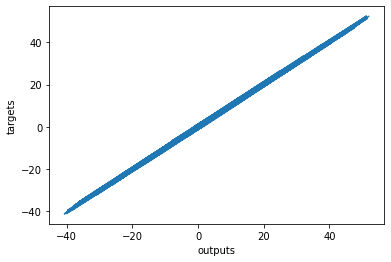

In [32]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.plot()

## Customising a TensorFlow model

In the NumPy example, we set the starting weights using randomiser functions. In this example so far, we let TensorFlow manage this, but we can customise this.

The tf.keras.layers.Dense() function that we used before to lay down the model can also take a kernal_initializer and bias_initializer parameter. kernal = weight.

We took the default learning rate last time too and we can create a custom one using tf.keras.optimizers.SGD(), providing the learning rate as a parameter.

Losses can  be adjusted but, its harder and at least initially, it is simpler to let TensorFlow manage it, 

In [38]:
input_size = 2 # we are putting in two inputs, xs and zs
output_size = 1 # we want one output, y


model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer,loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 0s - loss: 21.1189
Epoch 2/100
32/32 - 0s - loss: 1.2201
Epoch 3/100
32/32 - 0s - loss: 0.4303
Epoch 4/100
32/32 - 0s - loss: 0.3974
Epoch 5/100
32/32 - 0s - loss: 0.3888
Epoch 6/100
32/32 - 0s - loss: 0.3912
Epoch 7/100
32/32 - 0s - loss: 0.4276
Epoch 8/100
32/32 - 0s - loss: 0.3942
Epoch 9/100
32/32 - 0s - loss: 0.4194
Epoch 10/100
32/32 - 0s - loss: 0.4149
Epoch 11/100
32/32 - 0s - loss: 0.3737
Epoch 12/100
32/32 - 0s - loss: 0.3912
Epoch 13/100
32/32 - 0s - loss: 0.3938
Epoch 14/100
32/32 - 0s - loss: 0.4192
Epoch 15/100
32/32 - 0s - loss: 0.4241
Epoch 16/100
32/32 - 0s - loss: 0.3974
Epoch 17/100
32/32 - 0s - loss: 0.4503
Epoch 18/100
32/32 - 0s - loss: 0.3957
Epoch 19/100
32/32 - 0s - loss: 0.3709
Epoch 20/100
32/32 - 0s - loss: 0.4186
Epoch 21/100
32/32 - 0s - loss: 0.3736
Epoch 22/100
32/32 - 0s - loss: 0.3893
Epoch 23/100
32/32 - 0s - loss: 0.3789
Epoch 24/100
32/32 - 0s - loss: 0.4038
Epoch 25/100
32/32 - 0s - loss: 0.3804
Epoch 26/100
32/32 - 0s - loss: 0

The outputs of this are going to be mostly the same as before as nothing has changed fundamentally.